<a href="https://colab.research.google.com/github/DiptaJGomes/Co_authorship-Network-in-BD/blob/main/Network_Co_authorship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the edge list from CSV
df = pd.read_csv("author_edge_pairs.csv")

edges = list(df.itertuples(index=False, name=None))
G = nx.from_edgelist(edges)


In [14]:
# Calculate degrees of nodes
degree_sequence = [d for _, d in G.degree()]
degree_count = {x: degree_sequence.count(x) for x in set(degree_sequence)}

# Prepare degree and frequency lists for plotting
degrees = list(degree_count.keys())
frequencies = list(degree_count.values())

Calculating best minimal value for power law fit


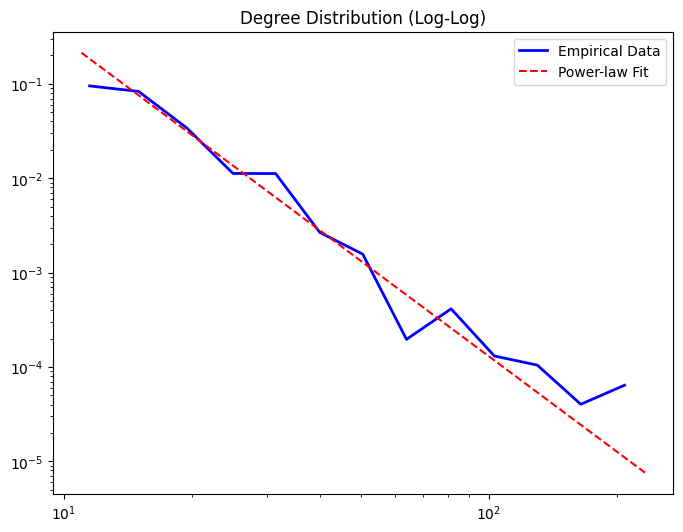

Power-law Gamma: 3.3568447906575267


In [15]:
import powerlaw

# Degree sequence
degrees = [d for _, d in G.degree()]

# Fit and plot power-law
fit = powerlaw.Fit(degrees)
plt.figure(figsize=(8, 6))
fit.plot_pdf(color='blue', linewidth=2, label='Empirical Data')
fit.power_law.plot_pdf(color='red', linestyle='--', label='Power-law Fit')
plt.title('Degree Distribution (Log-Log)')
plt.legend()
plt.show()

print(f"Power-law Gamma: {fit.power_law.alpha}")

In [ ]:
!pip install powerlaw

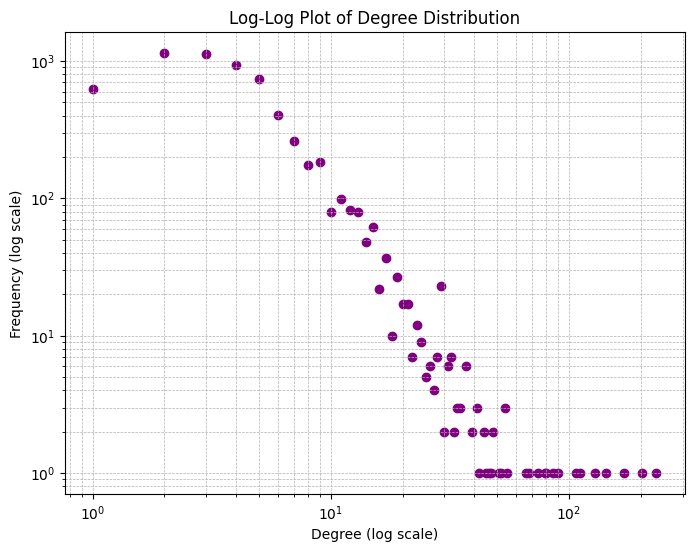

In [ ]:
# Log-Log Plot
plt.figure(figsize=(8, 6))
plt.scatter(degrees, frequencies, color='purple')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree (log scale)")
plt.ylabel("Frequency (log scale)")
plt.title("Log-Log Plot of Degree Distribution")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [ ]:
degree_centrality = nx.degree_centrality(G)
top_hubs = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 hubs:", top_hubs)

Top 5 hubs: [(4013, 0.03700174686358584), (989, 0.032078767667143085), (5867, 0.026996982690169924), (4333, 0.022709226615848815), (2926, 0.02048594568842306)]


In [16]:
global_clustering = nx.average_clustering(G)
print("Global Clustering Coefficient:", global_clustering)

local_clustering = nx.clustering(G)
print("Local Clustering Coefficients:", local_clustering)


Global Clustering Coefficient: 0.7992255844406377
Local Clustering Coefficients: {8552: 1.0, 8769: 1.0, 7251: 1.0, 8623: 0.26666666666666666, 3246: 0.6727272727272727, 6284: 0.5757575757575758, 3835: 1.0, 724: 0.5909090909090909, 3398: 1.0, 3430: 1.0, 343: 0.06881720430107527, 828: 0, 2544: 1.0, 4951: 0.6666666666666666, 4013: 0.012468551132159241, 4492: 1.0, 7895: 0.2073170731707317, 8189: 1.0, 3273: 1.0, 3401: 0.1619047619047619, 1865: 0.6111111111111112, 948: 0.06205673758865248, 4206: 0.10526315789473684, 5682: 0.38461538461538464, 7406: 1.0, 7633: 1.0, 5529: 1.0, 734: 1.0, 6776: 0.6212121212121212, 7851: 1.0, 3340: 0.4666666666666667, 4508: 0.07659850697825381, 5461: 0.5151515151515151, 5706: 1.0, 7378: 0.16363636363636364, 8002: 1.0, 2435: 0.6666666666666666, 3558: 0.050241545893719805, 8410: 1.0, 8784: 1.0, 6269: 0.07196969696969698, 6612: 1.0, 3825: 1.0, 5986: 0.38461538461538464, 3311: 1.0, 6326: 0.4, 2850: 0.2545454545454545, 3903: 1.0, 1897: 1.0, 5888: 1.0, 4659: 0.523809523

In [19]:
if nx.is_connected(G):
    avg_shortest_path_length = nx.average_shortest_path_length(G)
    print("Average Shortest Path Length:", avg_shortest_path_length)
else:
    print("The graph is not connected, so average shortest path cannot be computed.")


The graph is not connected, so average shortest path cannot be computed.


In [20]:
if not nx.is_connected(G):
    components = list(nx.connected_components(G))
    avg_path_lengths = []
    for component in components:
        subgraph = G.subgraph(component)
        avg_path_lengths.append(nx.average_shortest_path_length(subgraph))
    print("Average shortest path lengths for each component:", avg_path_lengths)


Average shortest path lengths for each component: [1.0, 7.733463602044053, 3.2204149723699302, 2.4172043010752686, 1.0, 1.0, 3.9918348571099993, 1.0, 1.0, 1.0, 1.7307692307692308, 1.0, 1.0, 1.92, 1.0, 1.7272727272727273, 1.0, 1.0, 1.0, 1.4, 1.3333333333333333, 2.274193548387097, 1.0, 1.0, 1.0, 1.0, 1.5333333333333334, 1.6181818181818182, 1.0, 1.0, 1.625, 1.4, 1.0, 1.0, 1.0, 1.0, 1.3, 1.0, 2.495016611295681, 1.0, 1.0, 1.0, 1.0, 1.4857142857142858, 1.7549407114624507, 1.6, 1.6666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.7428571428571429, 1.0, 2.3684210526315788, 1.0, 1.6833333333333333, 1.696969696969697, 2.185483870967742, 1.0, 1.0, 1.9649122807017543, 1.0, 1.4285714285714286, 1.0, 1.0, 1.0, 1.3333333333333333, 1.0, 1.0, 1.0, 1.4848484848484849, 1.0, 1.0, 2.1228070175438596, 1.0, 2.032967032967033, 1.0, 1.0, 1.0, 1.0, 1.488888888888889, 1.0, 1.0, 1.0, 1.0, 1.380952380952381, 1.0, 1.4285714285714286, 1.0, 1.380952380952381, 1.0, 1.0, 1.0, 1.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.3454545454545

In [21]:
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(G))
print(f"Number of communities detected: {len(communities)}")

Number of communities detected: 447


In [29]:
pip install python-louvain

In [32]:
pip uninstall community

Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/community-1.0.0b1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/community/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.11/dist-packages/community/community_louvain.py
    /usr/local/lib/python3.11/dist-packages/community/community_status.py
Proceed (Y/n)? Y
  Successfully uninstalled community-1.0.0b1


In [35]:
pip install python-louvain

Communities Detected using Label Propagation: [{8769, 8552, 8778, 7794, 8122}, {7940, 7821, 7696, 7826, 7966, 7967, 7969, 7842, 8359, 8623, 8625, 6979, 6980, 7890, 7251, 7252, 8021, 8152, 8668, 8163, 7913, 7531, 7802}, {4354, 259, 6468, 387, 5478, 6284, 3246, 703, 2258, 3640, 4379, 6847}, {513, 4615, 2573, 1041, 4118, 3608, 3615, 4143, 4664, 3131, 4169, 1611, 2124, 3149, 5712, 8787, 6229, 1622, 603, 5227, 6255, 1147, 5244, 5245, 4229, 4743, 2706, 5781, 2201, 3228, 3229, 2206, 165, 5286, 5799, 5802, 2220, 5292, 2735, 5299, 3252, 3765, 1207, 2234, 2235, 2748, 2749, 190, 2240, 5825, 2755, 1224, 3786, 3795, 724, 5333, 3286, 1239, 728, 5853, 5343, 2273, 2796, 5357, 5356, 5360, 2292, 1781, 2294, 6904, 4345, 3834, 3835, 1279, 3840, 4867, 263, 3848, 2833, 2321, 1300, 3351, 1818, 4890, 2335, 4897, 290, 6948, 4390, 6962, 4921, 5436, 1343, 1346, 3404, 4442, 1371, 2926, 3438, 881, 5492, 6005, 6006, 6007, 4469, 3444, 2942, 2943, 6530, 6536, 6537, 2443, 6546, 5011, 408, 412, 5028, 2994, 1460, 954, 5

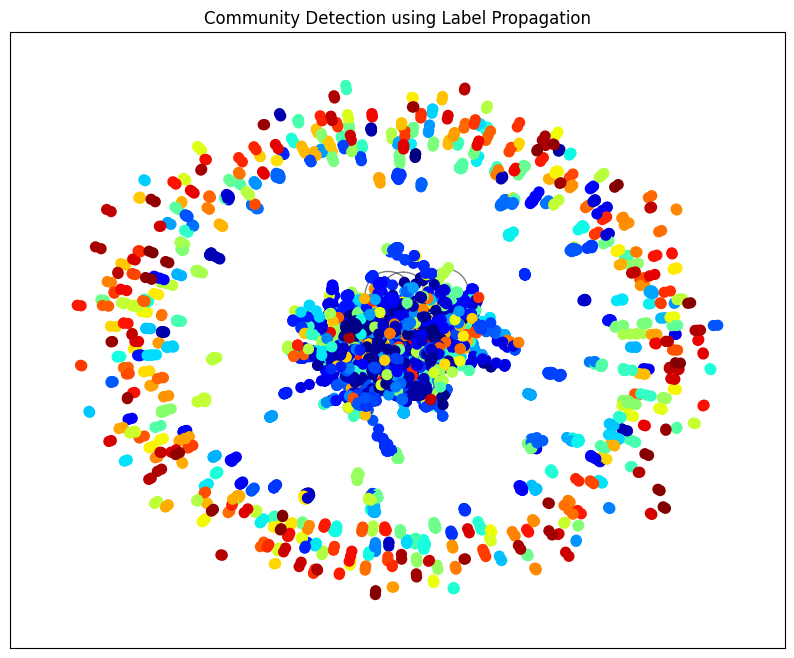

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

# Assume G is your graph
labels = nx.community.label_propagation_communities(G)
#labels = nx.label_propagation_communities(G)

# Convert to a list of community labels
community_list = list(labels)
print("Communities Detected using Label Propagation:", community_list)

# Visualize the communities
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))

# Assign colors to each community
colors = [i for i in range(len(community_list))]
node_colors = [next(color for color, community in enumerate(community_list) if node in community) for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.jet, node_color=node_colors)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Community Detection using Label Propagation")
plt.show()

In [41]:
G_removed_hub = G.copy()
hub_node = max(G.degree, key=lambda x: x[1])[0]
G_removed_hub.remove_node(hub_node)
print("Network size after removing the top hub:", len(G_removed_hub))

Network size after removing the top hub: 6297


In [42]:
assortativity = nx.degree_assortativity_coefficient(G)
print("Degree Assortativity Coefficient:", assortativity)

Degree Assortativity Coefficient: -0.07576299703156394


Number of Nodes: 9659
Number of Edges: 17142
 with degree 202
Average Degree: 3.5494357593953825
Network Density: 0.00036751250356133593
Degree Assortativity Coefficient: -0.0729310045604289
Global Clustering Coefficient: 0
Average Clustering Coefficient: 0.0
Number of Connected Components: 443
Largest Connected Component Size: 6397
Graph is not connected. No path length or diameter calculated.
Number of Communities Detected: 484


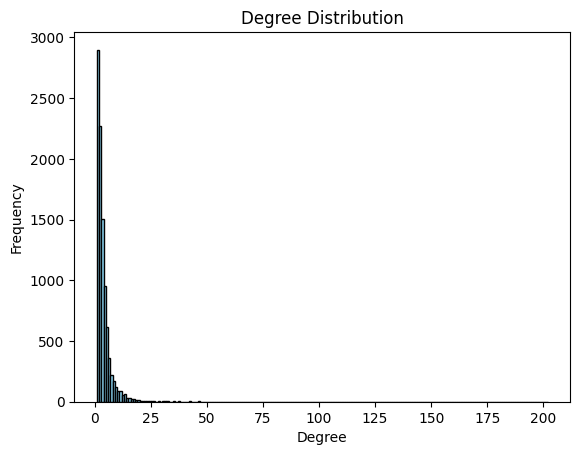

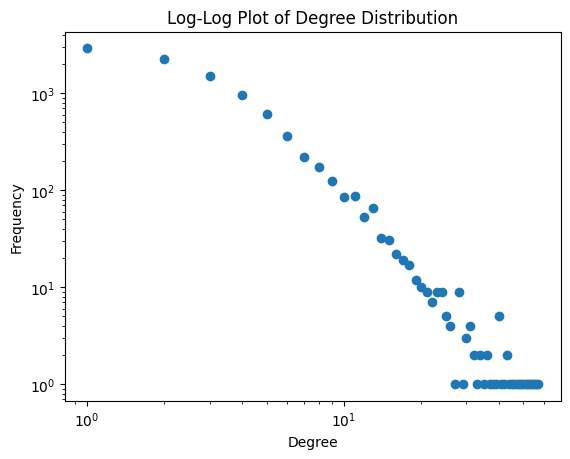

In [44]:
import networkx as nx

# Load or create a graph
G = nx.read_edgelist("author_edge_pairs.csv", delimiter=',', nodetype=str)

# 1. Number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print("Number of Nodes:", num_nodes)
print("Number of Edges:", num_edges)

# 2. Degree-related properties
degrees = dict(G.degree())
max_degree_node = max(degrees, key=degrees.get)
print("Max Degree Node:", max_degree_node, "with degree", degrees[max_degree_node])
print("Average Degree:", sum(degrees.values()) / num_nodes)

# 3. Density
density = nx.density(G)
print("Network Density:", density)

# 4. Degree Assortativity
assortativity = nx.degree_assortativity_coefficient(G)
print("Degree Assortativity Coefficient:", assortativity)

# 5. Clustering Coefficients
global_clustering = nx.transitivity(G)
avg_clustering = nx.average_clustering(G)
print("Global Clustering Coefficient:", global_clustering)
print("Average Clustering Coefficient:", avg_clustering)

# 6. Connected Components
num_connected_components = nx.number_connected_components(G)
largest_cc = max(nx.connected_components(G), key=len)
print("Number of Connected Components:", num_connected_components)
print("Largest Connected Component Size:", len(largest_cc))

# 7. Average Shortest Path Length and Diameter (for connected graphs)
if nx.is_connected(G):
    avg_shortest_path = nx.average_shortest_path_length(G)
    diameter = nx.diameter(G)
    print("Average Shortest Path Length:", avg_shortest_path)
    print("Network Diameter:", diameter)
else:
    print("Graph is not connected. No path length or diameter calculated.")

# 8. Community Detection using Louvain (requires community package)
from community import community_louvain

partition = community_louvain.best_partition(G)
num_communities = len(set(partition.values()))
print("Number of Communities Detected:", num_communities)

# 9. Plot Degree Distribution
import matplotlib.pyplot as plt

degree_values = list(degrees.values())
plt.hist(degree_values, bins=range(1, max(degree_values) + 1), color='skyblue', edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# 10. Log-log plot for degree distribution
import numpy as np

plt.figure()
degree_freq = np.array(nx.degree_histogram(G))
non_zero_deg = degree_freq[degree_freq > 0]
plt.loglog(range(1, len(non_zero_deg) + 1), non_zero_deg, marker='o', linestyle='none')
plt.title("Log-Log Plot of Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


In [45]:
import networkx as nx

# Assuming G is your graph
if nx.is_connected(G):
    diameter = nx.diameter(G)
    print("Network Diameter:", diameter)
else:
    # For disconnected graphs, use the largest connected component
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    diameter = nx.diameter(subgraph)
    print("Diameter of the Largest Connected Component:", diameter)


Diameter of the Largest Connected Component: 34


In [46]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
print("Top 5 by Degree Centrality:", sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

Top 5 by Degree Centrality: [('989\r', 0.02091530337544005), ('5867\r', 0.01408159039138538), ('4013', 0.013149720439014289), ('4013\r', 0.010975357216815076), ('1785', 0.010354110581901015)]
